In [1]:
# !wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

In [2]:
# !unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

In [3]:
# !ls

In [4]:
import os
folders = os.listdir("Images")

In [5]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")
classes = ["dogs","cats","horses","humans"]

In [6]:
import os
import shutil

# Create destination directories if they don't exist
for c in classes:
    p = os.path.join("val_images", c)
    if not os.path.exists(p):
        os.makedirs(p)

SPLIT = 0.9
for f in os.listdir("Images"):
    path = os.path.join("Images", f)
    imgs = os.listdir(path)

    split_size = int(SPLIT * len(imgs))
    files_to_move = imgs[split_size:]
    print(len(files_to_move))

    for img_f in files_to_move:
        src = os.path.join(path, img_f)
        dest = os.path.join("val_images", f, img_f)
        
        # Ensure the destination directory exists before moving
        if not os.path.exists(os.path.dirname(dest)):
            os.makedirs(os.path.dirname(dest))
        
        shutil.move(src, dest)


19
19
19
19


In [7]:
for f in folders:
    path = "Images/" + f
    print(os.listdir(path))
    print(f + " " + str(len(os.listdir(path))))

['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.11.jpg', 'cat.110.jpg', 'cat.111.jpg', 'cat.112.jpg', 'cat.113.jpg', 'cat.114.jpg', 'cat.115.jpg', 'cat.116.jpg', 'cat.117.jpg', 'cat.118.jpg', 'cat.119.jpg', 'cat.12.jpg', 'cat.120.jpg', 'cat.121.jpg', 'cat.122.jpg', 'cat.123.jpg', 'cat.124.jpg', 'cat.125.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.128.jpg', 'cat.129.jpg', 'cat.13.jpg', 'cat.130.jpg', 'cat.131.jpg', 'cat.132.jpg', 'cat.133.jpg', 'cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.142.jpg', 'cat.143.jpg', 'cat.144.jpg', 'cat.145.jpg', 'cat.146.jpg', 'cat.147.jpg', 'cat.148.jpg', 'cat.149.jpg', 'cat.15.jpg', 'cat.150.jpg', 'cat.151.jpg', 'cat.152.jpg', 'cat.153.jpg', 'cat.154.jpg', 'cat.155.jpg', 'cat.156.jpg', 'cat.157.jpg', 'cat.158.jpg', 'cat.159.jpg', 'c

In [8]:
from keras.preprocessing import image
from matplotlib import pyplot as plt


In [9]:
sample_path = "Images/cats/cat.1.jpg"
img = image.load_img(sample_path)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


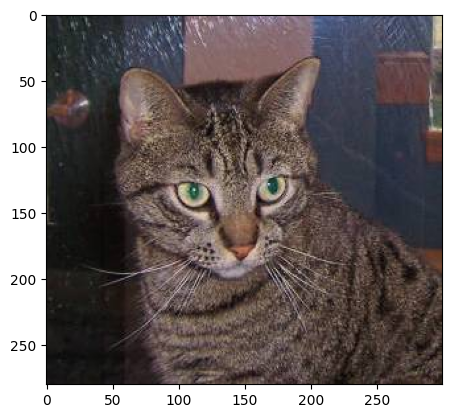

In [10]:
x = image.img_to_array(img)/255.0
plt.imshow(img)

In [11]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import *

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

c:\Users\116317\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,564 (2.45 MB)

 Trainable params: 642,564 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# from keras import optimizers
from keras.optimizers import Adam
from keras.src.legacy.preprocessing.image import ImageDataGenerator

adam = Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy", optimizer=adam,metrics=['acc'])

In [14]:
# model.fit(___) # useful when data set is small and it can fit inside the memory!

train_gen = ImageDataGenerator(rescale=1.0/255)
val_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_gen.flow_from_directory(
    "Images/",
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = val_gen.flow_from_directory(
    "val_images/",
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 648 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [15]:
for x,y in train_generator:
    print(x.shape,y.shape)
    break

(32, 150, 150, 3) (32, 4)


In [16]:
# Train our model
history = model.fit(
    train_generator,
    epochs = 40,
    steps_per_epoch = 7,
    validation_data = val_generator,
    validation_steps = 4
)

Epoch 1/40


c:\Users\116317\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - acc: 0.2372 - loss: 1.3874 - val_acc: 0.2734 - val_loss: 1.3919
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - acc: 0.2933 - loss: 1.3934 - val_acc: 0.4375 - val_loss: 0.6861
Epoch 3/40


c:\Users\116317\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - acc: 0.3862 - loss: 1.3754 - val_acc: 0.2969 - val_loss: 1.3705
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.3438 - val_loss: 0.6876
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - acc: 0.3073 - loss: 1.3737 - val_acc: 0.3984 - val_loss: 1.3648
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 925ms/step - acc: 0.3396 - loss: 1.3612 - val_acc: 0.3125 - val_loss: 0.6802
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 931ms/step - acc: 0.3797 - loss: 1.3459 - val_acc: 0.3281 - val_loss: 1.3469
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.3125 - val_loss: 0.6790
Epoch 9/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - acc: 0.2400 - loss: 1.3614 - val_acc: 0.3281 - val_loss: 1.3383
Epoch 10/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 805ms/step - acc: 0.3665 - loss: 1.3356 - val_acc: 0.4375 - val_loss: 0.6598
Epoch 11/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - acc: 0.3872 - loss: 1.3127

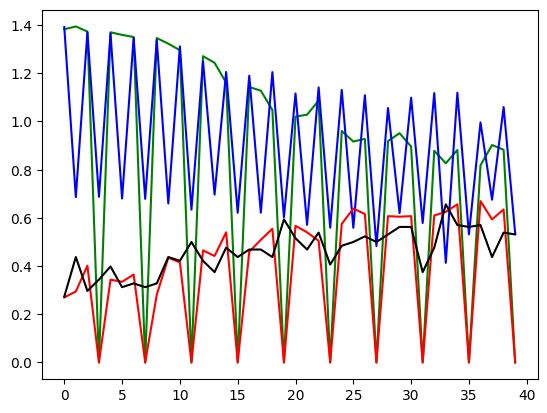

In [19]:
plt.figure(0)
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'b')

plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'black')
plt.show()